In [198]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [199]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit
for qubit in range(3):
    qc.h(qubit)
# draw the circuit
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [200]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = sim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

## Single Qubit Gates on Multi-Qubit Statevectors

In [201]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [202]:
sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = sim.run(qobj).result().get_unitary()

In [203]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

### Exercises

In [204]:
# Ex1: U = XZH
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.h(0)
qc.draw()

┌───┐┌───┐┌───┐
q: ┤ X ├┤ Z ├┤ H ├
   └───┘└───┘└───┘

In [205]:
sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
result = sim.run(assemble(qc)).result()
unitary = result.get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [206]:
# Ex2
qc = QuantumCircuit(3)
qc.x(0)
qc.z(1)
qc.h(2)
qc.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Z ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [207]:
qc.save_unitary()
sim = Aer.get_backend('aer_simulator')
unitary = sim.run(assemble(qc)).result().get_unitary()
array_to_latex(unitary, prefix='\\text{Circuit = }\n')

<IPython.core.display.Latex object>

## Multi-Qubit Gates

In [208]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [209]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [210]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = sim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix='\\text{Statevector = }')

<IPython.core.display.Latex object>

In [211]:
# CNOT with H-Gate
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [212]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, prefix='\\text{Statevector = }')

<IPython.core.display.Latex object>

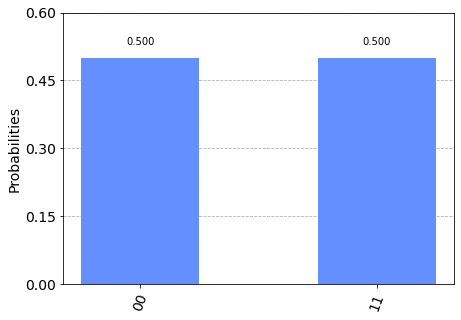

In [213]:
# entangled state
plot_histogram(result.get_counts())

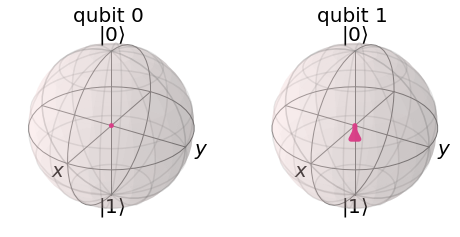

In [214]:
# visualize entangled states
plot_bloch_multivector(final_state)

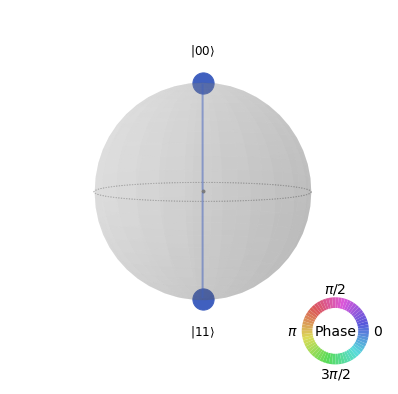

In [215]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

In [216]:
# Ex1
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [217]:
qc.save_unitary()
sim = Aer.get_backend('aer_simulator')
result = sim.run(assemble(qc)).result()
unitary = result.get_unitary()
array_to_latex(unitary)


<IPython.core.display.Latex object>